# Assigment 2: Logistic Regression

## 1. Logistic regression
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant's
probability of admission based the scores from those two exams.

### 1.1 Visualizing the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 16, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

In [3]:
def plotData(X, y):
    """plotData(X, y) plots the data points with + for the positive examples
       and o for the negative examples. X is assumed to be a Mx2 matrix.
    """
    fig, ax = plt.subplots(figsize=(9, 6))
    
    # positive data points, USING MASK y==1
    ax.plot(X[y==1, 0], X[y==1, 1], '+', markersize=8)
    
    # negative data points, USING MASK y==0
    ax.plot(X[y==0, 0], X[y==0, 1], 'o', markersize=8)

    
    return fig, ax

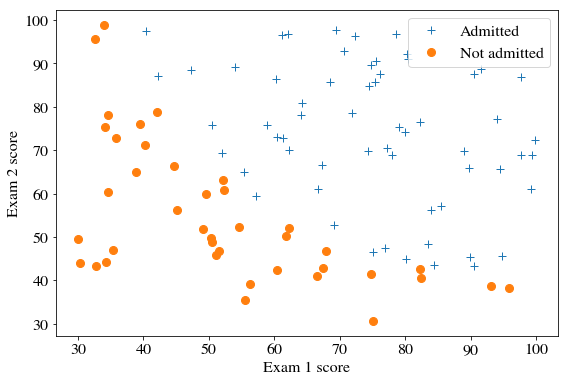

In [4]:
# load data
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]   # note y is 1d array


fig, ax = plotData(X, y)
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend(['Admitted', 'Not admitted'], loc='upper right')

### 1.2 Sigmoid function
Recall that the logistic regression hypothesis is defined as:
$$ h_\theta(x)=g(\theta^Tx)$$

where function g is the sigmoid function. The sigmoid function is defined as:
$$ g(z)=\frac{1}{1+e^{-z}}$$

In [5]:
def sigmoid(z):
    """sigmoid(z) computes the sigmoid of z. z can be a number,
    vector, or matrix. 
    """
    
    g = 1 / (1 + np.exp(-z))
    
    return g

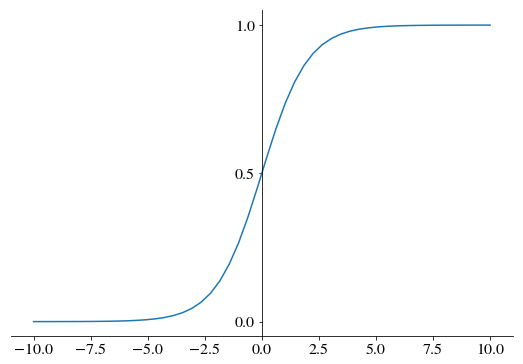

In [6]:
# Visualize sigmoid function
z = np.linspace(-10, 10)
g = sigmoid(z)

fig, ax = plt.subplots(figsize=(9, 6))

# move left y-axis to center
ax.spines['left'].set_position('center')

# eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# set y ticks
ax.set_yticks(np.array([0, 0.5, 1]))

ax.plot(z, g)

### 1.3 Cost function and gradient descent
Recall that the cost function in logistic regression is:
$$ J(\theta)=\frac{1}{m}\sum_{i=0}^m[-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}))]$$

and the gradient of the cost is a vector with the same length as $\theta$ where the jth element is defined as:
$$ \frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m} \sum_{i=0}^m(h_\theta(x^{(i)}-y{(i)})x_j^{(i)}$$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.

#### Vectorization
When calculating the above functions in MATLAB or Python, try vectorizing them. Assume $\mathbf X$ is a m-by-(n+1) matrix containing training sample inputs and additional 1s, $\mathbf y$ is m-by-1 vector containing training sample outputs, $\mathbf \theta$ is (n+1)-by-1 vector containing parameters in hypothesis $h_\theta$, then cost function can be vectorized as: 
$$ J(\theta)=\frac{1}{m} (-\mathbf y^T log(g(\mathbf{X\theta}))-(1-y^T)log(1-g(\mathbf{X\theta})))$$

while,
$$ \frac{\partial J(\theta)}{\partial \theta}=\frac{1}{m} \mathbf X^T (g(\mathbf{X\theta})-\mathbf y)$$

Note that $J(\theta)$ is a number, while the gradient $\frac{\partial J(\theta)}{\partial \theta}$ is a (n+1)-by-1 vector.

In [7]:
def costFunction(theta, X, y):
    """costFunction(theta, X, y) computes the cost using theta as the
       parameter for logistic regression and the gradient of the cost
       w.r.t. to the parameters.
    """
    
    m = len(y)
    
    # prepare for matrix calculations
    y = y[:, np.newaxis]
    theta = theta[:, np.newaxis]
    
    # used @ to replace np.dot()
    J = -((y.T @ np.log(sigmoid(X@theta))) + ((1-y.T) @ np.log(1-sigmoid(X@theta)))) / m
    #print(J.shape)
    J = J[0, 0]
    
    grad = (X.T @(sigmoid(X@theta) - y)) / m
    #print(grad.shape)
    
    return J, grad

In [8]:
# set up data for gradient descent
m, n = X.shape

# add intercept term to X
X_wb = np.concatenate((np.ones((m, 1)), X), axis=1)

theta0 = np.zeros(n+1)

# run gradient descent
cost, grad = costFunction(theta0, X_wb, y)

# Display result
print('Cost at test theta: {:.5f}'.format(cost))
print('Expected cost is approx 0.693')
print('Gradient at initial theta: \n{}'.format(grad))
print('Expected gradient is: \n-0.1000\n -12.0092\n -11.2628\n')

# another test
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X_wb, y)

# Display result
print('Cost at test theta: {:.5f}'.format(cost))
print('Expected cost is approx 0.218')
print('Gradient at initial theta: \n{}'.format(grad))
print('Expected gradient is: \n0.043\n 2.566\n 2.647\n')

Cost at test theta: 0.69315
Expected cost is approx 0.693
Gradient at initial theta: 
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradient is: 
-0.1000
 -12.0092
 -11.2628

Cost at test theta: 0.21833
Expected cost is approx 0.218
Gradient at initial theta: 
[[ 0.04290299]
 [ 2.56623412]
 [ 2.64679737]]
Expected gradient is: 
0.043
 2.566
 2.647



### 1.4 Learning parameters using unconstrained minimization functions
In MATLAB, fminunc is an optimization solver that finds the minimum of an unconstrained function. See https://www.mathworks.com/help/optim/ug/fminunc.html#but9rn9-5

In Python, scipy.optimize.minimize() function seems to do the same thing. See https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html

#### Notes for SciPy's minimization function
*scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)*
- method='TNC' works!!! Don't know why. TNC is truncated Newton algorithm. 
- x0 **must** be of shape (n,), i.e. 1D array, instead of 2D; **Furthermore, I think as a rule of thumb, use 1D array as a natural choice, unless encountered matrix multiplication where you have to extend it to 2D vector.**
- J can be number or 1x1 array; grad can be 1d or 2d vector
- use args to include X and y
- No need to separate cost and gradient function. Set jac to True, then fun is assumed to return the gradient along with the objective function. 

#### Implementation 1 - Use above costFunction

In [9]:
from scipy.optimize import minimize

# initial conidition, 1d array
theta0 = np.zeros(n+1)

# run optimization
result = minimize(costFunction, theta0, args=(X_wb, y), method='TNC', jac=True, options={'disp': True, 'maxiter':400})
print(result)

     fun: 0.20349770158947536
     jac: array([[  9.09409796e-09],
       [  9.53481005e-08],
       [  4.73354162e-07]])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131843,   0.20623159,   0.20147148])


#### Implementation 2 - separate cost and gradient function

In [10]:
# Separate cost and gradient from the return of the costFunction

def costF(theta, X, y):
    """costFunction(theta, X, y) computes the cost using theta as the
       parameter for logistic regression and the gradient of the cost
       w.r.t. to the parameters.
    """
    
    m = len(y)
    
    # prepare for matrix arithmetic calculations
    y = y[:, np.newaxis]
    theta = theta[:, np.newaxis]
    
    J = -((y.T @ np.log(sigmoid(X@theta))) + ((1-y.T) @ np.log(1-sigmoid(X@theta)))) / m
    
    return J


def gradientF(theta, X, y):
    """costFunction(theta, X, y) computes the cost using theta as the
       parameter for logistic regression and the gradient of the cost
       w.r.t. to the parameters.
    """
    
    m = len(y)
    
    # prepare for matrix arithmetic calculations
    y = y[:, np.newaxis]
    theta = theta[:, np.newaxis]
    
    grad = (X.T @(sigmoid(X@theta) - y)) / m
    
    return grad

In [11]:
# initial conidition, 1d array
theta0 = np.zeros(n+1)

# run optimization
result = minimize(costFunction, theta0, args=(X_wb, y), method='TNC', jac=True, options={'disp': True, 'maxiter':400})
print(result)

     fun: 0.20349770158947536
     jac: array([[  9.09409796e-09],
       [  9.53481005e-08],
       [  4.73354162e-07]])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131843,   0.20623159,   0.20147148])


### 1.5 Visualizing result
Plot decision boundary on training set figure.

Decision boundary is $\theta^T x=0$, i.e., $h_\theta(x)=0.5$.

In [12]:
def plotDecisionBoundary(theta, X, y):
    """ plots the data points with + for the 
       positive examples and o for the negative examples. X is assumed to be a either 
       Mx3 matrix, where the first column is an all-ones column for the intercept.
       In this case, decision boundary is a straight line.
    """
    
    # plot training set
    fig, ax = plotData(X[:, 1:], y)
    
    # two end points
    plot_x = np.array([np.min(X[:, 1])-2, np.max(X[:, 1])+2])
    #print(plot_x.shape)
    plot_y = -(theta[0]+theta[1]*plot_x) / theta[2]
    #print(plot_y.shape)
    
    ax.plot(plot_x, plot_y, '-')
        
    return fig, ax    

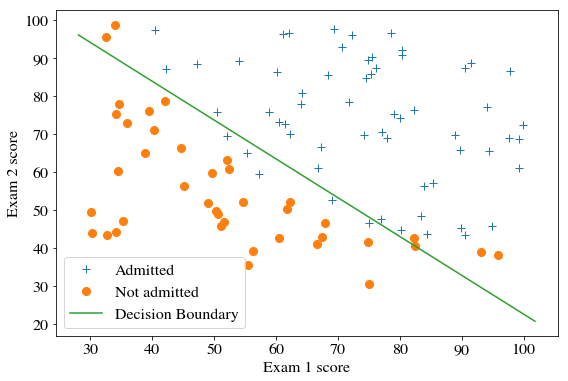

In [13]:
# Plot decision boundary
theta = result.x
fig, ax = plotDecisionBoundary(result.x, X_wb, y)
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend(['Admitted', 'Not admitted', 'Decision Boundary'])

### 1.6 Training accuracy
After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776.

Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. Accuracy of the classifier is the percentage of training samples it got correct. 

In [14]:
# theta result after training
theta = result.x

# test case
test_x = np.array([1, 45, 85])

# predict admission probability h_theta
h = sigmoid(sum(theta*test_x))
print('Admission probability for a student with an Exam 1 score of 45 and an Exam 2 score of 85 is {:.4f}'.format(h))
print('Expected result is 0.776')

Admission probability for a student with an Exam 1 score of 45 and an Exam 2 score of 85 is 0.7763
Expected result is 0.776


In [15]:
def predict(theta, X):
    """ computes the predictions for X using a 
        threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    """
    
    p = np.zeros(X.shape[0])
    
    # h=X*theta, then convert h to 1d
    h = (X @ theta[:, np.newaxis])[:, 0]
    
    # if h >= 0.5, predict 1
    p[h>=0.5] = 1
    
    return p

In [16]:
# compare prediction result with y and calculate accuracy
accuracy = sum((predict(theta, X_wb)==y).astype(int)) / m

print('Training accuracy is {:.2f}%.'.format(accuracy*100))

Training accuracy is 89.00%.


## 2. Regularized Logistic Regression

This part implements regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. 

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model. 

### 2.1 Visualizing the data

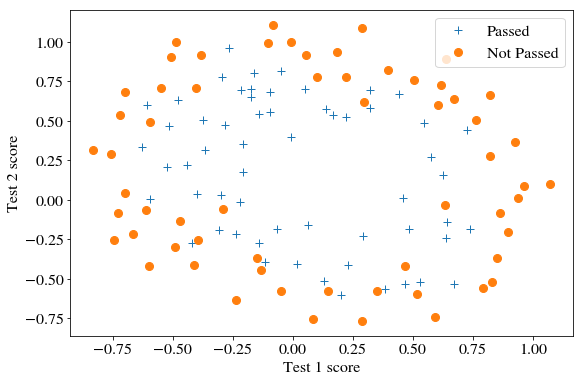

In [17]:
# load data
data = np.loadtxt("ex2data2.txt", delimiter=',')
X = data[:, :2]
y = data[:, 2]

# plot the data
fig, ax = plotData(X, y)
ax.set_xlabel('Test 1 score')
ax.set_ylabel('Test 2 score')
ax.legend(['Passed', 'Not Passed'], loc='upper right')

Figure shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

### 2.2 Feature mapping
One way to fit the data better is to create more features from each data point. In the following, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power:
$$mapFeature(x)=\left[\matrix{1\\ x_1\\ x_2\\ x_1^2\\ x_1x_2\\ x_2^2\\ x_1^3\\ \vdots\\ x_1x_2^5\\x_2^6}\right]_{28\times1}$$

As a result of this mapping, our vector of two features (the scores on
two QA tests) has been transformed into a 28-dimensional vector. A logistic
regression classifier trained on this higher-dimension feature vector will have
a more complex decision boundary and will appear nonlinear when drawn in
our 2-dimensional plot.

While the feature mapping allows us to build a more expressive classifier,
it also more susceptible to overfitting. In the next parts of the exercise, you
will implement regularized logistic regression to fit the data and also see for
yourself how regularization can help combat the overfitting problem.

In [18]:
def mapFeature(x1, x2):
    """maps the two input features
%   to quadratic features used in the regularization exercise.
%
%   Returns a new feature array with more features, comprising of 
%   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
%
%   Inputs X1, X2 must be the same size
    """
    
    degree = 6
    m = len(x1)
    
    # construct intercept term and original features x1 and x2
    res = np.ones((m, 3))
    res[:, 1] = x1
    res[:, 2] = x2
    
    # construct all other terms
    for i in range(2, degree+1):
        for j in range(i+1):
            res = np.concatenate((res, (x1**(i-j) * x2**j)[:, np.newaxis]), axis=1)
            
    return res

In [19]:
# map feature
X_wb = mapFeature(X[:, 0], X[:, 1])

print(X_wb.shape)

(118, 28)


### 2.3 Cost function and gradient

Regularized cost function in logistic regression is:
$$ J(\theta)=\frac{1}{m}\sum_{i=0}^m[-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}))]+\frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2$$



Note that j is from 1 and doesn't include j=0.
The jth element of the gradient of the cost function is:

$$ \frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m} \sum_{i=0}^m(h_\theta(x^{(i)}-y{(i)})x_j^{(i)},\qquad j=0$$

$$ \frac{\partial J(\theta)}{\partial \theta_j}=\left(\frac{1}{m} \sum_{i=0}^m(h_\theta(x^{(i)}-y{(i)})x_j^{(i)}\right)+\frac{\lambda}{m}\theta_j,\qquad j=1,...$$

#### Vectorize the equations

The vectorized functions will be:

$$ J(\theta)=\frac{1}{m} (-\mathbf y^T log(g(\mathbf{X\theta}))-(1-y^T)log(1-g(\mathbf{X\theta})))+\frac{\lambda}{2m}\mathbf \theta_{1n}^T\theta_{1n}$$

where $\mathbf \theta_{1n}$ is vector $\mathbf \theta$ without $\theta_0$

The first element of the gradient will be:

$$ \frac{\partial J(\theta)}{\partial \theta_0}=\frac{1}{m} \mathbf X^T(0,:) (g(\mathbf{X\theta})-\mathbf y)\qquad where\; \mathbf X^T(0,:)\; is\; first\; row\; of\; \mathbf X^T$$

The rest will be:

$$ \frac{\partial J(\theta)}{\partial \theta}=\frac{1}{m} \mathbf X^T(1:end,:) (g(\mathbf{X\theta})-\mathbf y)+\frac{\lambda}{m}\mathbf \theta(2:end)\qquad where\; \mathbf X^T(1:end,:)\; is\; the\; rest\; of\; \mathbf X^T$$

In [20]:
def costFucntionReg(theta, X, y, lmd):
    """computes the cost of using
%   theta as the parameter for regularized logistic regression and the
%   gradient of the cost w.r.t. to the parameters.
    """
    
    m = len(y)
    
    # prepare for matrix calculations
    y = y[:, np.newaxis]
    theta = theta[:, np.newaxis]
    
    # cost
    J = (-y.T@np.log(sigmoid(X@theta)))/m - ((1-y.T)@np.log(1-sigmoid(X@theta)))/m + (theta[1:].T@theta[1:])*lmd/(2*m)
    
    
    # gradient
    grad = np.zeros(theta.shape)

    # added newaxis in order to get 2d array instead of 1d array
    grad[0] = X.T[0, np.newaxis, :]@(sigmoid(X@theta)-y)/m
    
    grad[1:] = X.T[1:, :]@(sigmoid(X@theta)-y)/m + lmd*theta[1:]/m
    
    return J, grad

In [21]:
# init
theta0 = np.zeros(X_wb.shape[1])
lmd = 1 # lambda

# run gradient descent
cost, grad = costFucntionReg(theta0, X_wb, y, lmd)

print(cost)
print(grad[:5])

[[ 0.69314718]]
[[  8.47457627e-03]
 [  1.87880932e-02]
 [  7.77711864e-05]
 [  5.03446395e-02]
 [  1.15013308e-02]]


### 2.4 Learning parameters using 'minimize' function
Similar to 1.4, use fminunc to learn the optimal parameters $\theta$

In [22]:
# from scipy.optimize import minimize

# initial conidition, 1d array
# theta0 = np.zeros(n+1)

# run optimization
result = minimize(costFucntionReg, theta0, args=(X_wb, y, lmd), method='TNC', jac=True, options={'disp': True, 'maxiter':400})
print(result.x)

[ 1.27271027  0.62529965  1.18111686 -2.019874   -0.91743189 -1.43166929
  0.12393227 -0.36553118 -0.35725404 -0.17516292 -1.45817009 -0.05098418
 -0.61558555 -0.27469165 -1.19271299 -0.2421784  -0.206033   -0.04466178
 -0.27778949 -0.29539514 -0.45645981 -1.04319154  0.02779373 -0.29244868
  0.0155576  -0.32742405 -0.1438915  -0.92467487]


### 2.5 Plot Decision Boundary
Recall that decision boundary here is line $\theta^T x=0$, i.e., $h_\theta(x)=0.5$. In this case, decision boundary is not a straight line. 

In [23]:
def plotDecisionBoundary2(theta, X, y):
    """ plots the data points with + for the 
       positive examples and o for the negative examples. X is assumed to be a either 
       1) Mx3 matrix, where the first column is an all-ones column for the intercept.
       2) MxN, N>3 matrix, where the first column is all-ones
    """
    
    # plot training set
    fig, ax = plotData(X[:, 1:], y)
    
    if X.shape[1] == 3:
        # two end points
        plot_x = np.array([np.min(X[:, 1])-2, np.max(X[:, 1])+2])
        #print(plot_x.shape)
        plot_y = -(theta[0]+theta[1]*plot_x) / theta[2]
        #print(plot_y.shape)
        ax.plot(plot_x, plot_y, '-')
    
    elif X.shape[1] > 3:
        # This is for Case 2 in this assignment
        # in this case, decision boundary is not a straight line
        
        # define plot grid
        u = np.linspace(np.min(X[:, 1])*1.1, np.max(X[:, 1])*1.1)
        v = np.linspace(np.min(X[:, 2])*1.1, np.max(X[:, 2])*1.1)
        z = np.zeros((len(u), len(v)))
        
        # tweak u,v 's dimension for mapFeature to work, otherwise, ui, vj will be numbers
        # instead of arrays
        u = u[:, np.newaxis]
        v = v[:, np.newaxis]
        
        # calculate z
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
#                 print(ui.shape)
#                 print(vj.shape)
                z[i, j] = mapFeature(ui, vj) @ theta[:, np.newaxis]
        
        # plot, remember to transpose z
        u, v = np.meshgrid(u, v)
        ax.contour(u, v, z.T, levels=[0]) # level=0 meaning theta*X=0
        
    return fig, ax

Text(0.5,1,'lambda = 1')

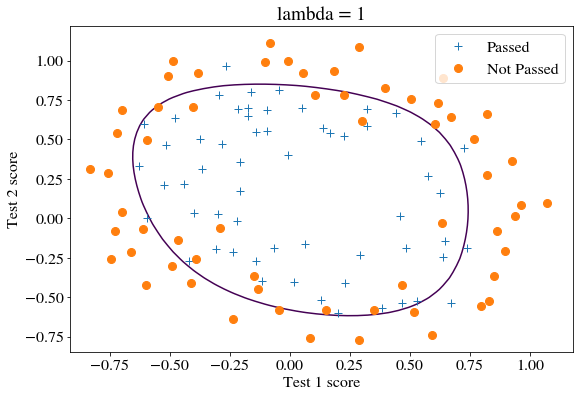

In [41]:
# Plot
fig, ax = plotDecisionBoundary2(result.x, X_wb, y)
ax.set_xlabel('Test 1 score')
ax.set_ylabel('Test 2 score')
ax.legend(['Passed', 'Not Passed'], loc='upper right')
ax.set_title('lambda = {:d}'.format(lmd))

# There is a discrepency in training accuracy here
expected ~83%, here it is ~80%.

In [54]:
# accuracy
# compare prediction result with y and calculate accuracy
print(((predict(result.x, X_wb)==y).astype(int)).shape)
#print(np.concatenate((predict(result.x, X_wb)[:, np.newaxis], y[:, np.newaxis]), axis=1))
accuracy = sum((predict(result.x, X_wb)==y).astype(int)) / len(y)

print('Training accuracy is {:.2f}%.'.format(accuracy*100))

(118,)
Training accuracy is 79.66%.


### 2.6 Regularization vs. Accuracy

Try different values of $\lambda$ and see how regularization affects the fitting accuracy on training samples.

0.796610169492


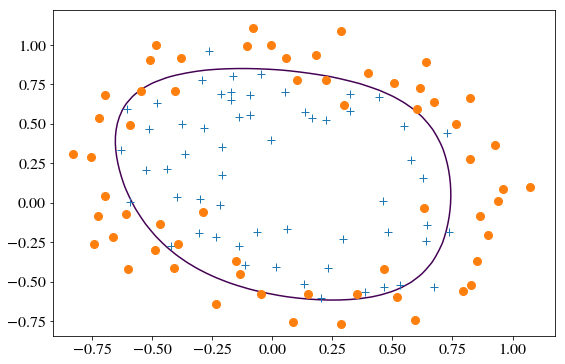

In [53]:
# list of values to try
lmd = 1

#for lmd in lmd_list:
    
# run optimization
result = minimize(costFucntionReg, theta0, args=(X_wb, y, lmd), method='TNC', jac=True, options={'disp': True, 'maxiter':400})

# compare prediction result with y and calculate accuracy
accuracy = sum((predict(result.x, X_wb)==y).astype(int)) / len(y)
print(accuracy)

fig, ax = plotDecisionBoundary2(result.x, X_wb, y)

In [47]:
result.x[:5]

array([ 1.27271027,  0.62529965,  1.18111686, -2.019874  , -0.91743189])